In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("/content/startup_funding.csv")
data.head(5)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [12]:
data.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,0,296,157,171,452,13,2097,23,177,72
1,1,438,1824,727,69,33,2030,40,434,72
2,2,296,1245,172,1582,13,1837,38,74,72
3,3,43,2394,234,1202,68,2285,20,252,72
4,4,43,641,229,497,61,1972,32,123,72


In [13]:
data.drop(['Sr No','Remarks'],axis=1,inplace=True)

In [14]:
data['Startup Name']=data['Startup Name'].str.replace('0','')
data['Industry Vertical']=data['Industry Vertical'].str.replace('0','')
data['City  Location']=data['City  Location'].str.replace('0','')
data['Investors Name']=data['Investors Name'].str.replace('0','')

In [15]:
data.head(5)

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [16]:
data['SubVertical'].fillna(data['SubVertical'].mode()[0],inplace=True)
data['Industry Vertical'].fillna(data['Industry Vertical'].mode()[0],inplace=True)

#converting amount in usd to integer

In [17]:
data["Amount in USD"]=data["Amount in USD"].str.replace(",","")
data["Amount in USD"]=data["Amount in USD"].str.replace("undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("Undisclosed","")
data["Amount in USD"]=data["Amount in USD"].str.replace("0N/A","")
data["Amount in USD"]=data["Amount in USD"].str.replace("unknown","")
data["Amount in USD"]=data["Amount in USD"].str.replace("+","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [19]:
filter1=data[data['Investors Name']=='Atul Jalan']
filter2=data[data['Industry Vertical'].str.contains("xc2")]

data.drop(filter1.index, inplace = True)
data.drop(filter2.index, inplace = True)

In [20]:
data["Amount in USD"]=pd.to_numeric(data["Amount in USD"])
data['Amount in USD'].fillna(data['Amount in USD'].mean(),inplace=True)

In [22]:
#Converting date to datetime and extracting month and year values
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("05/072018","05/07/2018")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("01/07/015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("010/7/2015","01/07/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("12/05.2015","12/05/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("13/04.2015","13/04/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("15/01.2015","15/01/2015")
data["Date dd/mm/yyyy"]=data["Date dd/mm/yyyy"].str.replace("22/01//2015","22/01/2015")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [23]:
data['Date dd/mm/yyyy']=pd.to_datetime(data['Date dd/mm/yyyy'])
data['Year']=data['Date dd/mm/yyyy'].dt.year
data['Month']=data['Date dd/mm/yyyy'].dt.month

#Who are the Top 10 investors in Indian ecossystem?

In [24]:
Top_investors=pd.DataFrame(data.groupby(['Investors Name']).sum()["Amount in USD"]).sort_values(by="Amount in USD",ascending=False)
Top_investors

,Amount in USD
Investors Name,
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
SoftBank Group,1.462000e+09
"Microsoft, eBay, Tencent Holdings",1.400000e+09
Vijay Shekhar Sharma,1.037074e+09
...,...
National Science and Technology Entrepreneurship Development Board,3.000000e+04
Naveen Gupta,3.000000e+04
Oranda Global & Others,3.000000e+04


[Text(0.5, 1.0, 'Top 10 Ivestors by amount Invested')]

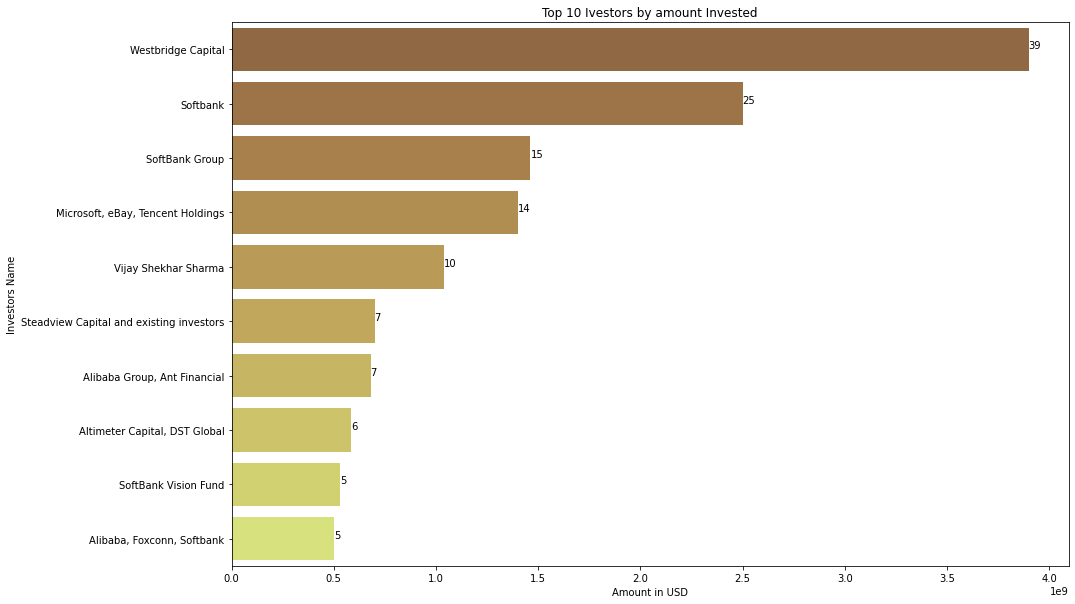

In [25]:
plt.figure(figsize=(15,10))
color1=['#9E6737','#AA743A','#B6823D','#C09141','#C9A046','#D1AF4B','#D7C051','#DDD059','#E1E162','#E4F26E']
sns.set_palette(sns.color_palette(color1))
g2=sns.barplot(data=(Top_investors[0:10]).reset_index(),x="Amount in USD",y='Investors Name')
for a in g2.patches:
    g2.annotate('{:.0f}'.format((a.get_width()/100000000).round(2)),
              ((a.get_width(),a.get_y()+a.get_height()/2)),
               ha="left", va="top",
               xytext=(0,9),
               textcoords="offset points")
    
g2.set(title="Top 10 Ivestors by amount Invested")

##In which city are the highest number of startups located

In [26]:
data_cities=data.dropna(how="any",axis=0,subset=['City  Location'])
data_cities.shape

(2847, 10)

In [27]:
data_cities_sum=pd.DataFrame(data_cities.groupby(['City  Location']).sum()["Amount in USD"])
data_cities_sum['% Investements']=((data_cities_sum['Amount in USD']/data_cities_sum['Amount in USD'].sum())*100).round(2)
data_cities_sum=data_cities_sum.reset_index().sort_values(by='% Investements',ascending=False)

In [28]:
Top_10 = data_cities_sum[['City  Location','% Investements']][0:10]
Top_10.loc[len(Top_10.index)] = ['Others', 100-(data_cities_sum['% Investements'][0:10]).sum()] 
Top_10=Top_10.sort_values(by='% Investements',ascending=False)

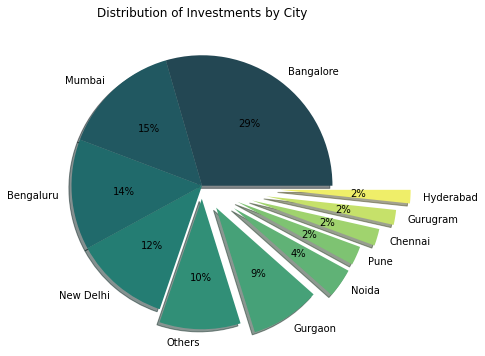

In [29]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Investments by City")
colors1 = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80','#4EF4D1']
colors=['#234753','#215861','#206A6B','#247D73','#318F77','#46A178','#60B276','#7EC372','#A0D36E','#C6E16A','#EFEE69']
plt.axis("equal")
g3=plt.pie(Top_10['% Investements'],labels=Top_10['City  Location'],colors=colors,autopct='%0.0f%%',
           shadow=True,explode=[0, 0, 0, 0, 0.1, 0.2,0.3,0.3,0.4,0.5,0.6])

plt.show()

#Bengaluru sees the highest investmensts followed by Mumbai & New Delhi

#Which industry verticals are most favored by the investors for funding?

In [30]:
Inv_verticals_Top_10=pd.DataFrame(data.groupby(['Industry Vertical']).sum()["Amount in USD"]).reset_index().sort_values(by='Amount in USD',ascending=False)[0:10]

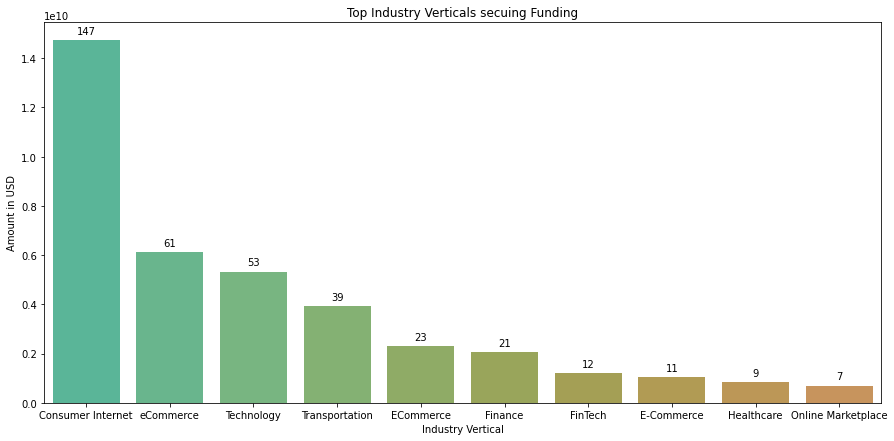

In [31]:
plt.figure(figsize=(15,7))
color2=['#4BC49E','#5CC28C','#6EBF7A','#7FBB69','#91B65B','#A1B14F','#B1AA48','#C0A345','#CD9C46','#D8944C']
sns.set_palette(sns.color_palette(color2))
g4=sns.barplot(data=Inv_verticals_Top_10,x='Industry Vertical',y='Amount in USD')
g4.set(title="Top Industry Verticals secuing Funding")

for a in g4.patches:
    g4.annotate('{:.0f}'.format((a.get_height()/100000000).round(2)),
                ((a.get_x()+a.get_width()/2),a.get_height()),
                ha="center",va="center",
                xytext=(0,9),
                textcoords= 'offset points'
               )

In [ ]:
#How is the funding ecosystem evolving with time ?

In [32]:
data['YearMonth']=data['Year']*100+data['Month']
data_time=data[['Date dd/mm/yyyy','YearMonth','City  Location','Amount in USD']]
data_time=data_time.dropna(how="any",axis=0,subset=['City  Location'])
data_time=pd.DataFrame(data_time[['YearMonth','City  Location']].value_counts()).reset_index().sort_values(by=['City  Location','YearMonth'],ascending=True)
data_time=data_time[data_time['City  Location'].isin(['Bengaluru','Mumbai','New Delhi','Gurgaon','Noida'])]
data_time.columns=['YearMonth','City  Location','Count']

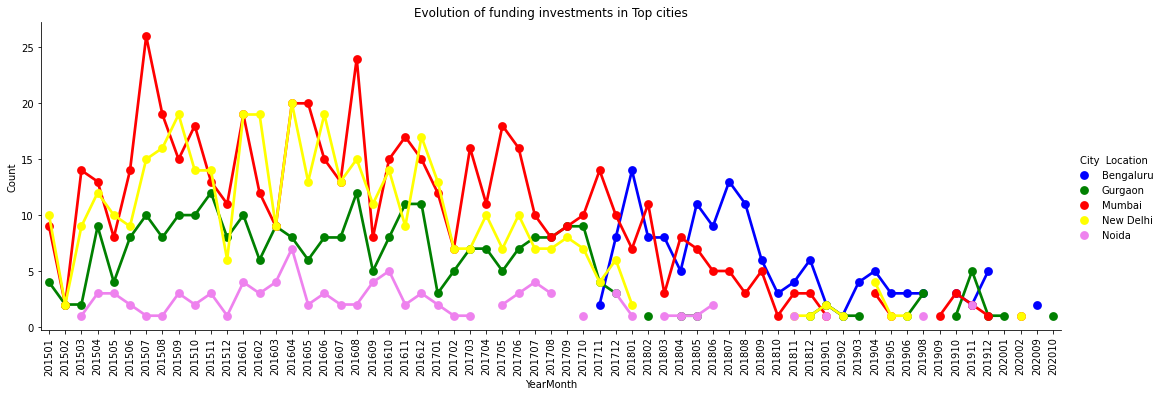

In [34]:
color3=['blue','green','red','yellow','violet']
sns.set_palette(sns.color_palette(color3))
g5=sns.catplot(data=data_time,x='YearMonth',y='Count',hue='City  Location',kind="point",height=5, aspect=3.0)
g5.set(title='Evolution of funding investments in Top cities')
plt.xticks(rotation=90)
plt.show()